In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MMR

## Online

In [2]:
# set fonts
plt.rcParams["font.family"] = "Times New Roman"

plt.rc('figure', titlesize=10)  # fontsize of the figure title
plt.rc('font', size=10)

# figure size
fig_height = 5
fig_width = 8

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.3",
}

# overall marker size
markersize = 5

# plot style for optimal method
alpha = 0.3
opt_style = {'color': 'r',
             'linestyle': '-',
             'marker': 'o',
             'markersize': markersize
             }
opt_style_fill = {'color': 'r',
                   'alpha': alpha,
                   'linewidth': 0,
                   }

acac_style = {'color': 'g',
             'linestyle': '-.',
             'marker': 'x',
             'markersize': markersize
             }
acac_style_fill = {'color': 'g',
                   'alpha': alpha,
                   'linewidth': 0,
                   }

acmm_style = {'color': 'g',
             'linestyle': '-',
             'marker': 'v',
             'markersize': markersize
             }
acmm_style_fill = {'color': 'g',
                   'alpha': alpha,
                   'linewidth': 0,
                   }

randmm_style = {'color': 'b',
             'linestyle': '--',
             'marker': '+',
             'markersize': markersize
             }
randmm_style_fill = {'color': 'b',
                   'alpha': alpha,
                   'linewidth': 0,
                   }

ellipsoidal_style = {'color': 'purple',
             'linestyle': ':',
             'marker': 's',
             'markersize': markersize
             }

poly_style = {'color': 'black',
             'linestyle': (0, (3, 1, 1, 1, 1, 1)),
             'marker': 'v',
             'markersize': markersize
             }

probpoly_style = {'color': 'black',
             'linestyle': (0, (3, 1, 1, 1, 1, 1)),
             'marker': '^',
             'markersize': markersize
             }


xlim = [0.95, 10]
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
def plot_objvals(df, ax, plot_col, k_list, plot_label, xlim, ylim, xticks, yticks=None, legend=False):

    # plot static heuristic
    elicitation_method = 'mmr'
    recommendation_method = 'mmr'
    fill_style = opt_style_fill

    if plot_col == 'true_rank':
        val_func = np.max
    else:
        val_func = np.max

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                  & (df['K'] == k)][plot_col].values) for k in k_list]
    ax.plot(k_list, val_list, label='{}+{}'.format(caption_objtype, caption_objtype), **opt_style)


    # plot AC + AC
    elicitation_method = 'AC'
    recommendation_method = 'AC'
    recommendation_method = 'mmr_AC'
    fill_style = acac_style_fill


    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='AC+AC', **acac_style)


    # plot random + maximin
    elicitation_method = 'random'
    recommendation_method = 'mmr'
    fill_style = randmm_style_fill

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='RAND+{}'.format(caption_objtype), **randmm_style)


    # plot ellipsoidal + mean
    elicitation_method = 'ellipsoidal'
    recommendation_method = 'mean'

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='ellip+{}'.format(caption_objtype), **ellipsoidal_style)


    # plot polyhedral + AC
    elicitation_method = 'polyhedral'
    recommendation_method = 'AC'

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='poly+{}'.format(caption_objtype), **poly_style)

    # plot prob-polyhedral + AC
    elicitation_method = 'probpoly'
    recommendation_method = 'AC'

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='probpoly+{}'.format(caption_objtype), **probpoly_style)



    # ticks and gridlines
    if yticks is not None:
        ax.set_yticks(yticks)

    ax.set_xticks(xticks)
    ax.grid(linestyle='--', linewidth='0.2', color='black', which='major')

    ax.tick_params(
        axis='y',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        left=True,
        right=False,
        labelleft=True,
    )

    # set axis limits
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    # add a plot label
    label_x = 1.03
    label_y = 0.5
    ax.text(label_x, label_y, plot_label,
            horizontalalignment='left',
            verticalalignment='center',
            rotation=-90,
            backgroundcolor='gray',
            bbox=label_bbox_props,
            transform=ax.transAxes,
            )
    if legend:
        ax.legend()

In [4]:
# define files and directories

version_str = 'online_synthetic_mmr_resubmission_v7'

# objtype must be 'mmu' or 'mmr
objtype = 'mmr'
assert objtype in ['mmr', 'mmu']

if objtype == 'mmr':
    caption_objtype = 'MMR'
if objtype == 'mmu':
    caption_objtype = 'MMU'


# directory where images will be saved
img_dir = "test_results/0923_data_almost_done/online/agentseed/"

# results file
output_file1 = 'test_results/0923_data_almost_done/online/agentseed/online_mmr_data_0925_2_000.csv'
output_file2 = 'test_results/0923_data_almost_done/online/agentseed/online_mmr_data_0925_1_025.csv'

df1 = pd.read_csv(output_file1, delimiter=';')
df2 = pd.read_csv(output_file2, delimiter=';')

### Plan 1

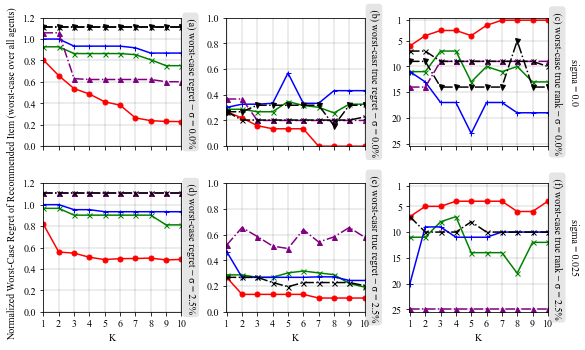

In [5]:
# ---------------
# Plot objective value
# ---------------

# which column to plot data from
if objtype == "mmu":
    plot_col = "mmu_objval_normalized_new".format(objtype)
if objtype == "mmr":
    plot_col = "mmr_objval_normalized_new".format(objtype)

df = df1
k_list = [k for k in list(sorted(df["K"].unique())) if k > 0]

# get all num features, num items, gamma
gamma_list = [0, 0.025]

num_cols = 3
num_rows = 2

fig, axs = plt.subplots(
    num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True, sharey=False,
)

letter_dict = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
}
title_dict = {
    0: "worst-case regret \u2212 \u03C3 = 0.0%",
    1: "worst-casr true regret \u2212 \u03C3 = 0.0%",
    2: "worst-case true rank \u2212 \u03C3 = 0.0%",
    3: "worst-case regret \u2212 \u03C3 = 2.5%",
    4: "worst-casr true regret \u2212 \u03C3 = 2.5%",
    5: "worst-case true rank \u2212 \u03C3 = 2.5%",
}
plot_col = ["mmr_objval_normalized_new", "true_regret_normalized_new", "true_rank"]
img_ind = 0

# plot first row: num items
i_row = 0
for i_col in range(3):
    if i_col == 0:
        ylim = [0, 1.2]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    if i_col == 1:
        ylim = [0, 1.0]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    if i_col == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df1

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    img_ind += 1
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_col],
        k_list,
        plot_label,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )
label_x = 1.15
label_y = 0.5
ax.text(
    label_x,
    label_y,
    "sigma = 0.0",
    horizontalalignment="left",
    verticalalignment="center",
    rotation=-90,
    transform=ax.transAxes,
)
# second first row: num num_features
i_row = 1
for i_col in range(3):
    if i_col == 0:
        ylim = [0, 1.2]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    if i_col == 1:
        ylim = [0, 1.0]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    if i_col == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df2

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    img_ind += 1
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_col],
        k_list,
        plot_label,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )

    ax.set_xlabel("K")

label_x = 1.15
label_y = 0.5
ax.text(
    label_x,
    label_y,
    "sigma = 0.025",
    horizontalalignment="left",
    verticalalignment="center",
    rotation=-90,
    transform=ax.transAxes,
)
# set a single ylabel
if objtype == "mmu":
    fig.text(
        0.0,
        0.5,
        "Worst-Case Utility of Recommended Item (worst-case over all agents)",
        ha="center",
        va="center",
        rotation="vertical",
    )
if objtype == "mmr":
    fig.text(
        0.0,
        0.5,
        "Normalized Worst-Case Regret of Recommended Item (worst-case over all agents)",
        ha="center",
        va="center",
        rotation="vertical",
    )
plt.tight_layout()

# plt.savefig(
#     os.path.join(img_dir, "online_mmr_data_0925.pdf".format(version_str)),
#     bbox_inches="tight",
# )
plt.show()

### Plan 2

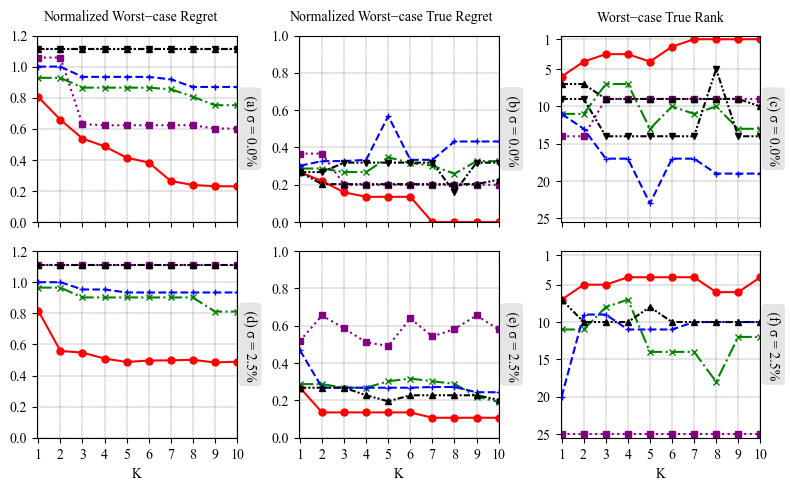

In [82]:
# ---------------
# Plot objective value
# ---------------

# which column to plot data from
if objtype == "mmu":
    plot_col = "mmu_objval_normalized_new".format(objtype)
if objtype == "mmr":
    plot_col = "mmr_objval_normalized_new".format(objtype)

df = df1
k_list = [k for k in list(sorted(df["K"].unique())) if k > 0]

num_cols = 3
num_rows = 2

fig, axs = plt.subplots(
    num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True, sharey=False,
)

letter_dict = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
}
title_dict = {
    0: "\u03C3 = 0.0%",
    1: "\u03C3 = 0.0%",
    2: "\u03C3 = 0.0%",
    3: "\u03C3 = 2.5%",
    4: "\u03C3 = 2.5%",
    5: "\u03C3 = 2.5%",
}
plot_col = ["mmr_objval_normalized_new", "true_regret_normalized_new", "true_rank"]
plot_name = ["Normalized Worst\u2212case Regret", "Normalized Worst\u2212case True Regret", "Worst\u2212case True Rank"]
name_x = [1.2, 0.5, 2.6]
name_y = [1.32, 1.1, -1.8]
img_ind = 0

# plot first row: num items
i_row = 0
for i_col in range(3):
    if i_col == 0:
        ylim = [0, 1.2]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    if i_col == 1:
        ylim = [0, 1.0]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    if i_col == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df1

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_col],
        k_list,
        plot_label,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )
    ax.text(
        name_x[img_ind],
        name_y[img_ind],
        plot_name[img_ind],

        verticalalignment="center",
    )
    
    img_ind += 1
label_x = 1.15
label_y = 0.5

# second first row: num num_features
i_row = 1
for i_col in range(3):
    if i_col == 0:
        ylim = [0, 1.2]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    if i_col == 1:
        ylim = [0, 1.0]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    if i_col == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df2

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    img_ind += 1
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_col],
        k_list,
        plot_label,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )

    ax.set_xlabel("K")

plt.tight_layout()

plt.savefig(
    os.path.join(img_dir, "online_mmr_data_0926_v2.pdf".format(version_str)),
    bbox_inches="tight",
)
plt.show()

### Plan 3

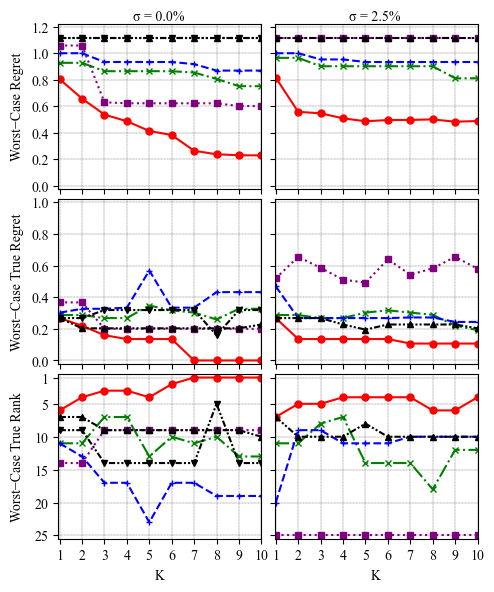

In [7]:
# ---------------
# Plot objective value
# ---------------

# which column to plot data from
if objtype == "mmu":
    plot_col = "mmu_objval_normalized_new".format(objtype)
if objtype == "mmr":
    plot_col = "mmr_objval_normalized_new".format(objtype)

df = df1
k_list = [k for k in list(sorted(df["K"].unique())) if k > 0]

num_cols = 2
num_rows = 3
fig_width, fig_height = 5, 6

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.2",
}

fig, axs = plt.subplots(
    num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True, sharey=False,
)

letter_dict = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
}
title_dict = {
    0: "\u03C3 = 0.0%",
    1: "\u03C3 = 0.0%",
    2: "\u03C3 = 0.0%",
    3: "\u03C3 = 2.5%",
    4: "\u03C3 = 2.5%",
    5: "\u03C3 = 2.5%",
}
plot_col = ["mmr_objval_normalized_new", "true_regret_normalized_new", "true_rank"]
plot_name = ["Worst\u2212Case Regret", "Worst\u2212Case True Regret", "Worst\u2212Case True Rank"]
img_ind = 0

# plot first row: num items
i_col = 0
for i_row in range(3):
    if i_row == 0:
        ylim = [-0.02, 1.22]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    if i_row == 1:
        ylim = [-0.02, 1.02]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    if i_row == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df1

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_row],
        k_list,
        None,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )
    if i_row == 0:
        ax.text(
            5.4,
            1.33,
            "\u03C3 = 0.0%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    ax.text(
        -0.17,
        0.5,
        plot_name[img_ind],
        horizontalalignment='right',
        verticalalignment='center',
        rotation=90,
        transform=ax.transAxes,
    )
    
    img_ind += 1
    
ax.set_xlabel("K")
label_x = 1.15
label_y = 0.5

# second first row: num num_features
i_col = 1
for i_row in range(3):
    if i_row == 0:
        ylim = [-0.02, 1.22]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    if i_row == 1:
        ylim = [-0.02, 1.02]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    if i_row == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df2

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    img_ind += 1
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_row],
        k_list,
        None,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )
    if i_row == 0:
        ax.text(
            5.4,
            1.33,
            "\u03C3 = 2.5%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    ax.set(yticklabels=[])
ax.set_xlabel("K")

plt.tight_layout(w_pad=0.1, h_pad=0.1)

plt.savefig(
    os.path.join(img_dir, "online_mmr_data_1017_v4.pdf".format(version_str)),
    bbox_inches="tight",
)
plt.show()

## Offline

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set fonts
from matplotlib.ticker import AutoMinorLocator, NullFormatter, LogLocator, MultipleLocator, FuncFormatter

In [2]:
plt.rcParams["mathtext.fontset"] = "stix"
# plt.rcParams["mathtext.fontsize"] = 12

plt.rcParams["font.family"] = "Times New Roman"

plt.rc('figure', titlesize=10)  # fontsize of the figure title
plt.rc('font', size=10)

# figure size
fig_height = 2.5
fig_width = 3

num_cols = 1
num_rows = 1

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.3",
}

# overall marker size
markersize = 5

# plot style for optimal method
opt_style = {'color': 'r',
             'linestyle': '-',
             'marker': 'o',
             'markersize': markersize
             }

# plot style for random (median)
rand_style_med = {'color': 'b',
                  'linestyle': '--',
                  'marker': '+',
                  'markersize': markersize
                  }

# random (fill)
rand_style_fill = {'color': 'b',
                   'alpha': 0.3,
                   'linewidth': 0,
                   }

xlim = [0.95, 10]
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
def plot_objvals(df, ax, plot_col, k_list, plot_label, xlim, ylim, xticks, yticks):

    # plot static heuristic
    val_list = [df[(df['method'] == '{}_heuristic'.format(objtype)) & (df['K'] == k)][plot_col].values[0] for k in k_list]
    ax.plot(k_list, val_list, label='OPT-hstc', **opt_style)

    # plot median val of random
    val_list = [df[(df['method'] == 'random') & (df['K'] == k)][plot_col].median() for k in k_list]
    ax.plot(k_list, val_list, label='RAND', **rand_style_med)

    # plot fill between min/max of random
    val_list_min = [df[(df['method'] == 'random') & (df['K'] == k)][plot_col].min() for k in k_list]
    val_list_max = [df[(df['method'] == 'random') & (df['K'] == k)][plot_col].max() for k in k_list]
    ax.fill_between(k_list, val_list_min, y2=val_list_max, **rand_style_fill)

    # ticks and gridlines
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.grid(linestyle='-', linewidth='0.2', color='black', which='major')

    ax.tick_params(
        axis='y',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        left=True,
        right=False,
        labelleft=True,
    )

    # set axis limits
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    # add a plot label
    label_x = 1.03
    label_y = 0.5
    ax.text(label_x, label_y, plot_label,
            horizontalalignment='left',
            verticalalignment='center',
            rotation=-90,
            backgroundcolor='gray',
            bbox=label_bbox_props,
            transform=ax.transAxes,
            )


# -------------------------------------------------------------------------------------------------------------
#  plots of runtime
# ----------------------------------------------------------------------------------------------------------------------

# note that there should be only one random sample
def plot_runtimes(df, ax, k_list, plot_label, xlim, xticks):

    # plot static heuristic
    val_list = [float(df[(df['method'] == '{}_heuristic'.format(objtype)) & (df['K'] == k)]['solve_time'].values[0]) for k in k_list]
    ax.plot(k_list, val_list, label='OPT-hstc', **opt_style)

    # median of random
    time_list = [df[(df['method'] == 'random') & (df['K'] == k)]['{}_objective_eval_time'.format(objtype)].median() for k in k_list]
    val_list = np.cumsum(time_list)
    ax.plot(k_list, val_list, label='RAND (obj. eval)', **rand_style_med)

    # plot fill between min/max of random
    val_list_min = np.cumsum([df[(df['method'] == 'random') & (df['K'] == k)]['{}_objective_eval_time'.format(objtype)].astype(float).min() for k in k_list])
    val_list_max = np.cumsum([df[(df['method'] == 'random') & (df['K'] == k)]['{}_objective_eval_time'.format(objtype)].astype(float).max() for k in k_list])
    ax.fill_between(k_list, val_list_min, y2=val_list_max, **rand_style_fill)

    ax.set_yscale('log')

    # # ticks and gridlines
    # yticks = [10**i for i in [-1, 0, 1, 2, 3, 4]]
    # ytick_labels = [' ', '1', ' ', '10^2', ' ', '10^4']

    ax.set_xticks(xticks)
    # ax.set_yticks(yticks, ytick_labels)
    ax.grid(linestyle='-', linewidth='0.2', color='black', which='major')
    ax.grid(linestyle='-', linewidth='0.1', color='black', which='minor')

    # ml = MultipleLocator(5)
    # ax.yaxis.set_minor_locator(ml)

    locmin = LogLocator(base=10.0, subs=(0.25, 0.5, 0.75, 1.), numticks=15)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(NullFormatter())

    def time_format_func(value, tick_number):
        if value == 10 ** 0:
            return '$10^0$'
        if value == 10 ** 1:
            return '$10^1$'
        if value == 10 ** 2:
            return '$10^2$'
        if value == 10 ** 3:
            return '$10^3$'
        if value == 10 ** 4:
            return '$10^4$'
        else:
            return ''

    locmaj = LogLocator(base=10.0, subs=(1.,), numticks=15)
    ax.yaxis.set_major_locator(locmaj)
    ax.yaxis.set_major_formatter(FuncFormatter(time_format_func))

    ax.tick_params(
        axis='y',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        left=True,
        right=False,
        labelleft=True,
    )
    # set axis limits
    # ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    # add a plot label
    label_x = 1.03
    label_y = 0.5
    ax.text(label_x, label_y, plot_label,
            horizontalalignment='left',
            verticalalignment='center',
            rotation=-90,
            backgroundcolor='gray',
            bbox=label_bbox_props,
            transform=ax.transAxes,
            )

In [4]:
# define files and directories

version_str = 'offline_data_mmr_resubmission_final'

# objtype must be 'mmu' or 'mmr
objtype = 'mmr'
assert objtype in ['mmr', 'mmu']

if objtype == 'mmr':
    caption_objtype = 'MMR'
if objtype == 'mmu':
    caption_objtype = 'MMU'


# directory where images will be saved
img_dir = "test_results/0923_data_almost_done/offline/"

# results file
output_file1 = 'test_results/0923_data_almost_done/offline/offline_mmr_data_0924_2_000.csv'
output_file2 = 'test_results/0923_data_almost_done/offline/offline_mmr_data_0924_1_025.csv'

df1 = pd.read_csv(output_file1, delimiter=';')
df2 = pd.read_csv(output_file2, delimiter=';')

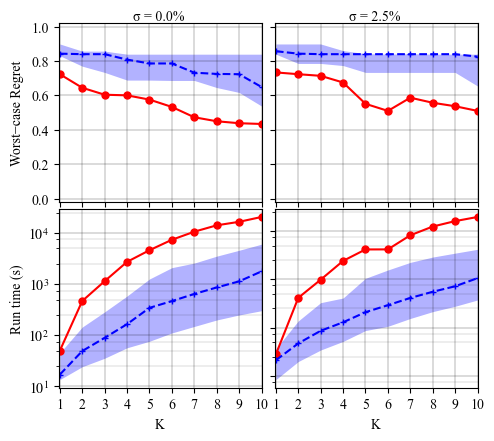

In [5]:
# ---------------
# Plot objective value
# ---------------

# which column to plot data from
if objtype == "mmu":
    plot_col = "mmu_objval_normalized_new".format(objtype)
if objtype == "mmr":
    plot_col = "mmr_objval_normalized_new".format(objtype)

df = df1
k_list = [k for k in list(sorted(df["K"].unique())) if k > 0]

num_cols = 2
num_rows = 2
fig_width, fig_height = 5, 4.5

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.2",
}

fig, axs = plt.subplots(
    num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True, sharey=False,
)


plot_col = ["mmr_objval_normalized_new", "true_regret_normalized_new", "true_rank"]
plot_name = ["Worst\u2212case Regret", "Run time (s)"]
img_ind = 0
ylim = [-0.02, 1.02]
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
# plot first row: num items
i_col = 0
for i_row in range(2):

    ax = axs[i_row, i_col]

    df_tmp = df1

    if i_row == 0:
        plot_objvals(
            df_tmp,
            ax,
            plot_col[i_row],
            k_list,
            None,
            xlim,
            ylim,
            xticks,
            yticks=yticks,
        )
        ax.text(
            5.4,
            1.1,
            "\u03C3 = 0.0%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    if i_row ==1:
        plot_runtimes(df_tmp, ax, k_list, None, xlim, xticks)
    ax.text(
        -0.17,
        0.5,
        plot_name[img_ind],
        horizontalalignment='right',
        verticalalignment='center',
        rotation=90,
        transform=ax.transAxes,
    )
    
    img_ind += 1
    
ax.set_xlabel("K")
label_x = 1.15
label_y = 0.5

# second first row: num num_features
i_col = 1
for i_row in range(2):
    ax = axs[i_row, i_col]

    df_tmp = df2

    # show_xlabels = False
    img_ind += 1
    if i_row == 0:
        plot_objvals(
            df_tmp,
            ax,
            plot_col[i_row],
            k_list,
            None,
            xlim,
            ylim,
            xticks,
            yticks=yticks,
        )
        ax.text(
            5.4,
            1.1,
            "\u03C3 = 2.5%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    if i_row ==1:
        plot_runtimes(df_tmp, ax, k_list, None, xlim, xticks)
    ax.set(yticklabels=[])
ax.set_xlabel("K")

plt.tight_layout(w_pad=0.1, h_pad=0.1)

plt.savefig(
    os.path.join(img_dir, "offline_mmr_data_0929.pdf".format(version_str)),
    bbox_inches="tight",
)
plt.show()

# MMU

## Online

In [63]:
def plot_objvals(df, ax, plot_col, k_list, plot_label, xlim, ylim, xticks, yticks=None, legend=False):

    # plot static heuristic
    elicitation_method = 'maximin'
    recommendation_method = 'maximin'
    fill_style = opt_style_fill

    if plot_col == 'true_rank':
        val_func = np.max
    else:
        val_func = np.max

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                  & (df['K'] == k)][plot_col].values) for k in k_list]
    ax.plot(k_list, val_list, label='{}+{}'.format(caption_objtype, caption_objtype), **opt_style)


    # plot AC + AC
    elicitation_method = 'AC'
    recommendation_method = 'robust_AC'
    fill_style = acac_style_fill


    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='AC+AC', **acac_style)


    # plot random + maximin
    elicitation_method = 'random'
    recommendation_method = 'maximin'
    fill_style = randmm_style_fill

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='RAND+{}'.format(caption_objtype), **randmm_style)


    # plot ellipsoidal + mean
    elicitation_method = 'ellipsoidal'
    recommendation_method = 'mean'

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='ellip+{}'.format(caption_objtype), **ellipsoidal_style)


    # plot polyhedral + AC
    elicitation_method = 'polyhedral'
    recommendation_method = 'AC'

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='poly+{}'.format(caption_objtype), **poly_style)

    # plot prob-polyhedral + AC
    elicitation_method = 'probpoly'
    recommendation_method = 'AC'

    val_list = [val_func(df[(df['elicitation_method'] == elicitation_method)
                   & (df['recommendation_method'] == recommendation_method)
                   & (df['K'] == k)][plot_col]) for k in k_list]
    ax.plot(k_list, val_list, label='probpoly+{}'.format(caption_objtype), **probpoly_style)



    # ticks and gridlines
    if yticks is not None:
        ax.set_yticks(yticks)

    ax.set_xticks(xticks)
    ax.grid(linestyle='--', linewidth='0.2', color='black', which='major')

    ax.tick_params(
        axis='y',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        left=True,
        right=False,
        labelleft=True,
    )

    # set axis limits
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    # add a plot label
    label_x = 1.03
    label_y = 0.5
    ax.text(label_x, label_y, plot_label,
            horizontalalignment='left',
            verticalalignment='center',
            rotation=-90,
            backgroundcolor='gray',
            bbox=label_bbox_props,
            transform=ax.transAxes,
            )
    if legend:
        ax.legend()

In [64]:
# define files and directories

version_str = 'online_synthetic_mmu_resubmission_v7'

# objtype must be 'mmu' or 'mmr
objtype = 'mmu'
assert objtype in ['mmr', 'mmu']

if objtype == 'mmr':
    caption_objtype = 'MMR'
if objtype == 'mmu':
    caption_objtype = 'MMU'


# directory where images will be saved
img_dir = "test_results/0923_data_almost_done/mmu/online/"

# results file
output_file1 = 'test_results/0923_data_almost_done/mmu/online/online_mmu_data_1016_2_000.csv'
output_file2 = 'test_results/0923_data_almost_done/mmu/online/online_mmu_data_1016_2_025.csv'

df1 = pd.read_csv(output_file1, delimiter=';')
df2 = pd.read_csv(output_file2, delimiter=';')

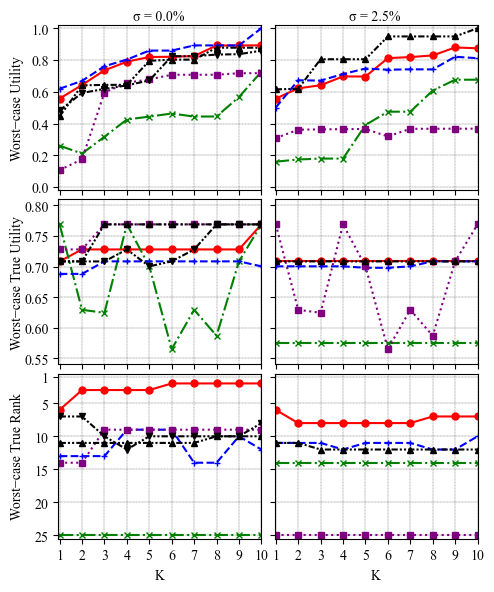

In [69]:
# ---------------
# Plot objective value
# ---------------

# which column to plot data from
if objtype == "mmu":
    plot_col = "mmu_objval_normalized_new".format(objtype)
if objtype == "mmr":
    plot_col = "mmr_objval_normalized_new".format(objtype)

df = df1
k_list = [k for k in list(sorted(df["K"].unique())) if k > 0]

num_cols = 2
num_rows = 3
fig_width, fig_height = 5, 6

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.2",
}

fig, axs = plt.subplots(
    num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True, sharey=False,
)

letter_dict = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
}
title_dict = {
    0: "\u03C3 = 0.0%",
    1: "\u03C3 = 0.0%",
    2: "\u03C3 = 0.0%",
    3: "\u03C3 = 2.5%",
    4: "\u03C3 = 2.5%",
    5: "\u03C3 = 2.5%",
}
plot_col = ["mmu_objval_normalized_new", "true_u", "true_rank"]
plot_name = ["Worst\u2212Case Utility", "Worst\u2212Case True Utility", "Worst\u2212Case True Rank"]
img_ind = 0

# plot first row: num items
i_col = 0
for i_row in range(3):
    if i_row == 0:
        ylim = [-0.02, 1.02]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
#         ylim = None
#         yticks = None
    if i_row == 1:
        ylim = [0.54, 0.81]
        yticks = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
#         ylim = None
#         yticks = None
    if i_row == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df1

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_row],
        k_list,
        None,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )
    if i_row == 0:
        ax.text(
            5.4,
            1.12,
            "\u03C3 = 0.0%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    ax.text(
        -0.17,
        0.5,
        plot_name[img_ind],
        horizontalalignment='right',
        verticalalignment='center',
        rotation=90,
        transform=ax.transAxes,
    )
    
    img_ind += 1
    
ax.set_xlabel("K")
label_x = 1.15
label_y = 0.5

# second first row: num num_features
i_col = 1
for i_row in range(3):
    if i_row == 0:
        ylim = [-0.02, 1.02]
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
#         ylim = None
#         yticks = None
    if i_row == 1:
        ylim = [0.54, 0.81]
        yticks = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
#         ylim = None
#         yticks = None
    if i_row == 2:
        ylim = [25 + 0.5, 0.5]
        yticks = [1, 5, 10, 15, 20, 25]

    ax = axs[i_row, i_col]

    df_tmp = df2

    # show_xlabels = False
    plot_label = " ({}) {}".format(letter_dict[img_ind], title_dict[img_ind])
    img_ind += 1
    plot_objvals(
        df_tmp,
        ax,
        plot_col[i_row],
        k_list,
        None,
        xlim,
        ylim,
        xticks,
        yticks=yticks,
    )
    if i_row == 0:
        ax.text(
            5.4,
            1.12,
            "\u03C3 = 2.5%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    ax.set(yticklabels=[])
ax.set_xlabel("K")

plt.tight_layout(w_pad=0.1, h_pad=0.1)

plt.savefig(
    os.path.join(img_dir, "online_mmu_data_1016_v4.pdf".format(version_str)),
    bbox_inches="tight",
)
plt.show()

## Offline

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set fonts
from matplotlib.ticker import AutoMinorLocator, NullFormatter, LogLocator, MultipleLocator, FuncFormatter

In [57]:
plt.rcParams["mathtext.fontset"] = "stix"
# plt.rcParams["mathtext.fontsize"] = 12

plt.rcParams["font.family"] = "Times New Roman"

plt.rc('figure', titlesize=10)  # fontsize of the figure title
plt.rc('font', size=10)

# figure size
fig_height = 2.5
fig_width = 3

num_cols = 1
num_rows = 1

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.3",
}

# overall marker size
markersize = 5

# plot style for optimal method
opt_style = {'color': 'r',
             'linestyle': '-',
             'marker': 'o',
             'markersize': markersize
             }

# plot style for random (median)
rand_style_med = {'color': 'b',
                  'linestyle': '--',
                  'marker': '+',
                  'markersize': markersize
                  }

# random (fill)
rand_style_fill = {'color': 'b',
                   'alpha': 0.3,
                   'linewidth': 0,
                   }

xlim = [0.95, 10]
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [58]:
def plot_objvals(df, ax, plot_col, k_list, plot_label, xlim, ylim, xticks, yticks):

    # plot static heuristic
    val_list = [df[(df['method'] == '{}_heuristic'.format(objtype)) & (df['K'] == k)][plot_col].values[0] for k in k_list]
    ax.plot(k_list, val_list, label='OPT-hstc', **opt_style)

    # plot median val of random
    val_list = [df[(df['method'] == 'random') & (df['K'] == k)][plot_col].median() for k in k_list]
    ax.plot(k_list, val_list, label='RAND', **rand_style_med)

    # plot fill between min/max of random
    val_list_min = [df[(df['method'] == 'random') & (df['K'] == k)][plot_col].min() for k in k_list]
    val_list_max = [df[(df['method'] == 'random') & (df['K'] == k)][plot_col].max() for k in k_list]
    ax.fill_between(k_list, val_list_min, y2=val_list_max, **rand_style_fill)

    # ticks and gridlines
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.grid(linestyle='-', linewidth='0.2', color='black', which='major')

    ax.tick_params(
        axis='y',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        left=True,
        right=False,
        labelleft=True,
    )

    # set axis limits
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    # add a plot label
    label_x = 1.03
    label_y = 0.5
    ax.text(label_x, label_y, plot_label,
            horizontalalignment='left',
            verticalalignment='center',
            rotation=-90,
            backgroundcolor='gray',
            bbox=label_bbox_props,
            transform=ax.transAxes,
            )


# -------------------------------------------------------------------------------------------------------------
#  plots of runtime
# ----------------------------------------------------------------------------------------------------------------------

# note that there should be only one random sample
def plot_runtimes(df, ax, k_list, plot_label, xlim, xticks):

    # plot static heuristic
    val_list = [float(df[(df['method'] == '{}_heuristic'.format(objtype)) & (df['K'] == k)]['solve_time'].values[0]) for k in k_list]
    ax.plot(k_list, val_list, label='OPT-hstc', **opt_style)

    # median of random
    time_list = [df[(df['method'] == 'random') & (df['K'] == k)]['{}_objective_eval_time'.format(objtype)].median() for k in k_list]
    val_list = np.cumsum(time_list)
    ax.plot(k_list, val_list, label='RAND (obj. eval)', **rand_style_med)

    # plot fill between min/max of random
    val_list_min = np.cumsum([df[(df['method'] == 'random') & (df['K'] == k)]['{}_objective_eval_time'.format(objtype)].astype(float).min() for k in k_list])
    val_list_max = np.cumsum([df[(df['method'] == 'random') & (df['K'] == k)]['{}_objective_eval_time'.format(objtype)].astype(float).max() for k in k_list])
    ax.fill_between(k_list, val_list_min, y2=val_list_max, **rand_style_fill)

    ax.set_yscale('log')

    # # ticks and gridlines
    # yticks = [10**i for i in [-1, 0, 1, 2, 3, 4]]
    # ytick_labels = [' ', '1', ' ', '10^2', ' ', '10^4']

    ax.set_xticks(xticks)
    # ax.set_yticks(yticks, ytick_labels)
    ax.grid(linestyle='-', linewidth='0.2', color='black', which='major')
    ax.grid(linestyle='-', linewidth='0.1', color='black', which='minor')

    # ml = MultipleLocator(5)
    # ax.yaxis.set_minor_locator(ml)

    locmin = LogLocator(base=10.0, subs=(0.25, 0.5, 0.75, 1.), numticks=15)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(NullFormatter())

    def time_format_func(value, tick_number):
        if value == 10 ** 0:
            return '$10^0$'
        if value == 10 ** 1:
            return '$10^1$'
        if value == 10 ** 2:
            return '$10^2$'
        if value == 10 ** 3:
            return '$10^3$'
        if value == 10 ** 4:
            return '$10^4$'
        else:
            return ''

    locmaj = LogLocator(base=10.0, subs=(1.,), numticks=15)
    ax.yaxis.set_major_locator(locmaj)
    ax.yaxis.set_major_formatter(FuncFormatter(time_format_func))

    ax.tick_params(
        axis='y',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        left=True,
        right=False,
        labelleft=True,
    )
    # set axis limits
    # ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    # add a plot label
    label_x = 1.03
    label_y = 0.5
    ax.text(label_x, label_y, plot_label,
            horizontalalignment='left',
            verticalalignment='center',
            rotation=-90,
            backgroundcolor='gray',
            bbox=label_bbox_props,
            transform=ax.transAxes,
            )

In [59]:
# define files and directories

version_str = 'offline_data_mmu_resubmission_final'

# objtype must be 'mmu' or 'mmr
objtype = 'mmu'
assert objtype in ['mmr', 'mmu']

if objtype == 'mmr':
    caption_objtype = 'MMR'
if objtype == 'mmu':
    caption_objtype = 'MMU'


# directory where images will be saved
img_dir = "test_results/0923_data_almost_done/mmu/offline/"

# results file
output_file1 = 'test_results/0923_data_almost_done/mmu/offline/offline_mmu_data_1016_1_000.csv'
output_file2 = 'test_results/0923_data_almost_done/mmu/offline/offline_mmu_data_1016_1_025.csv'

df1 = pd.read_csv(output_file1, delimiter=';')
df2 = pd.read_csv(output_file2, delimiter=';')

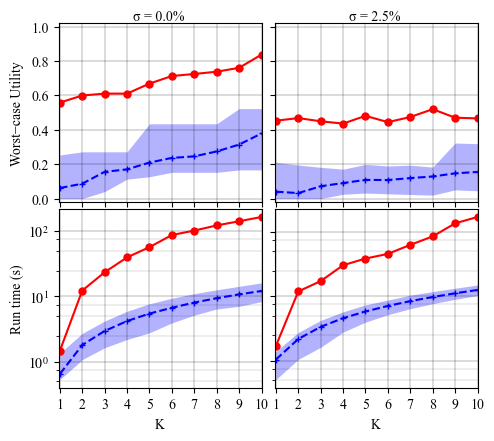

In [60]:
# ---------------
# Plot objective value
# ---------------

# which column to plot data from
if objtype == "mmu":
    plot_col = "mmu_objval_normalized_new".format(objtype)
if objtype == "mmr":
    plot_col = "mmr_objval_normalized_new".format(objtype)

df = df1
k_list = [k for k in list(sorted(df["K"].unique())) if k > 0]

num_cols = 2
num_rows = 2
fig_width, fig_height = 5, 4.5

label_bbox_props = {
    'pad': 0,
    'alpha': 0.2,
    'color': 'gray',
    'linewidth': 0.2,
    'boxstyle': "round,pad=0.2",
}

fig, axs = plt.subplots(
    num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True, sharey=False,
)


plot_col = ["mmu_objval_normalized_new", "true_u", "true_rank"]
plot_name = ["Worst\u2212case Utility", "Run time (s)"]
img_ind = 0
ylim = [-0.02, 1.02]
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
# plot first row: num items
i_col = 0
for i_row in range(2):

    ax = axs[i_row, i_col]

    df_tmp = df1

    if i_row == 0:
        plot_objvals(
            df_tmp,
            ax,
            plot_col[i_row],
            k_list,
            None,
            xlim,
            ylim,
            xticks,
            yticks=yticks,
        )
        ax.text(
            5.4,
            1.1,
            "\u03C3 = 0.0%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    if i_row ==1:
        plot_runtimes(df_tmp, ax, k_list, None, xlim, xticks)
    ax.text(
        -0.17,
        0.5,
        plot_name[img_ind],
        horizontalalignment='right',
        verticalalignment='center',
        rotation=90,
        transform=ax.transAxes,
    )
    
    img_ind += 1
    
ax.set_xlabel("K")
label_x = 1.15
label_y = 0.5

# second first row: num num_features
i_col = 1
for i_row in range(2):
    ax = axs[i_row, i_col]

    df_tmp = df2

    # show_xlabels = False
    img_ind += 1
    if i_row == 0:
        plot_objvals(
            df_tmp,
            ax,
            plot_col[i_row],
            k_list,
            None,
            xlim,
            ylim,
            xticks,
            yticks=yticks,
        )
        ax.text(
            5.4,
            1.1,
            "\u03C3 = 2.5%",
            horizontalalignment='center',
            verticalalignment='top',
#             backgroundcolor='gray',
#             bbox=label_bbox_props,
        )
    if i_row ==1:
        plot_runtimes(df_tmp, ax, k_list, None, xlim, xticks)
    ax.set(yticklabels=[])
ax.set_xlabel("K")

plt.tight_layout(w_pad=0.1, h_pad=0.1)

plt.savefig(
    os.path.join(img_dir, "offline_mmu_data_1016.pdf".format(version_str)),
    bbox_inches="tight",
)
plt.show()